In [38]:
import dataRead
import dataClean

import runTrain
import runTest
import writeResult

In [39]:
# Read data
reload(dataRead)
X_train,X_test,word_vecs = dataRead.do()

In [ ]:
# Test Above function here


In [312]:
reload(dataClean)
X_train_features,X_test_features = dataClean.clean(X_train,X_test)
X_train_features,X_test_features = dataClean.getWordVectors(X_train_features,X_test_features,word_vecs)
X_train_features,X_test_features = dataClean.getSentenceVectors(X_train_features,X_test_features)

In [313]:
# Test Above function here

In [55]:
# Train model
reload(runTrain)
runTrain.do(X_train_features)

In [6]:
# Test Above function here


In [68]:
# Test model
reload(runTest)
result = runTest.do(X_test_features)

In [69]:
# Test Above function here


In [124]:
# Get Loss of result
reload( getLoss)
getLoss.do(result,X_train_features)

('EAP:',
 0.67440277290272199,
 'MWS:',
 0.61805501993181355,
 'HPL:',
 0.60017764704326304)

In [ ]:
# Test Above function here


In [622]:
# Write Results
reload(writeResult)
writeResult.do(result,X_test_features)

In [ ]:
# Test Above function here

In [125]:
#                          #
# Add test functions below #
#                          #


In [ ]:
# Plots
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

la = np.linalg
author = [author for author in X_train_features['author']]
X = [sentence for sentence in X_train_features['sentence_vectors']]
U, s, Vh = la.svd(X, full_matrices = False)

#plot
col = {'EAP':'red','MWS':'cyan','HPL':'yellow'}
for i in range(1000):
    plt.scatter(U[i,0], U[i,1],color = col[author[i]])
plt.plot()

In [441]:
# Character Count
import seaborn as sns
pal = sns.color_palette()

train_sents = pd.Series(X_train['text'].tolist()).astype(str)
test_sents = pd.Series(X_test['text'].tolist()).astype(str)

dist_train = train_sents.apply(len)
dist_test = test_sents.apply(len)
plt.figure(figsize=(10, 15))
plt.hist(dist_train, bins=100, range=[20, 1000], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=100, range=[20, 1000], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in sentences', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 149.07 std-train 106.81 mean-test 147.77 std-test 109.66 max-train 4663.00 max-test 4437.00


Text(0,0.5,u'Probability')

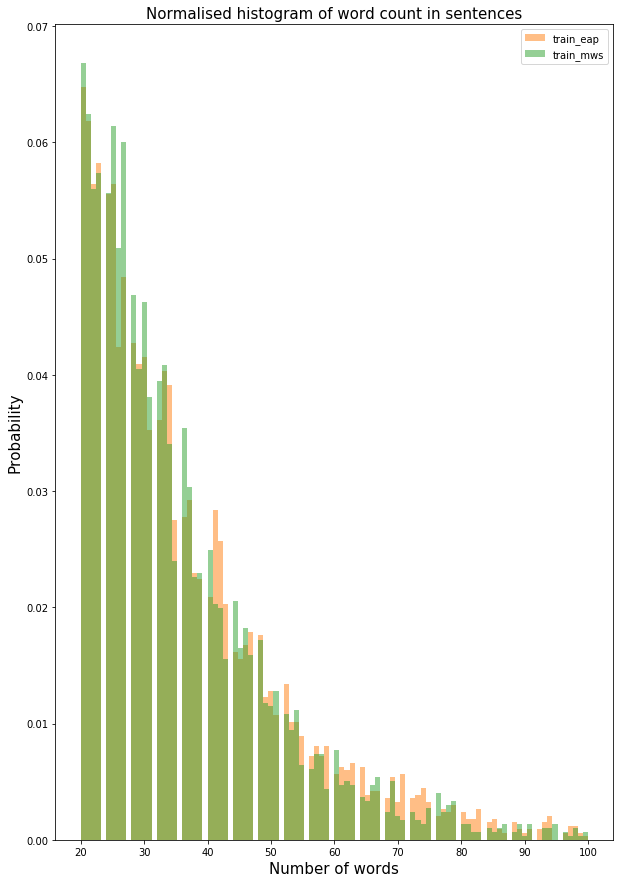

In [325]:
# Word Count
import seaborn as sns
pal = sns.color_palette()

train_eap = pd.Series(X_train_features[X_train_features['author'] == 'EAP']['text'].tolist())
train_mws = pd.Series(X_train_features[X_train_features['author'] == 'MWS']['text'].tolist())
train_hpl = pd.Series(X_train_features[X_train_features['author'] == 'HPL']['text'].tolist())
dist_train_eap = train_eap.apply(len)
dist_train_mws = train_mws.apply(len)
dist_train_hpl = train_hpl.apply(len)
plt.figure(figsize=(10, 15))
plt.hist(dist_train_eap, bins=100, range=[20, 100], color=pal[1], normed=True,alpha=0.5, label='train_eap')
plt.hist(dist_train_mws, bins=100, range=[20, 100], color=pal[2], normed=True,alpha=0.5, label='train_mws')
#plt.hist(dist_train_hpl, bins=100, range=[20, 100], color=pal[3], normed=True,alpha=0.5, label='train_hpl')
plt.title('Normalised histogram of word count in sentences', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

# print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
#                           dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [395]:
# Stop word analysis
from nltk.corpus import stopwords

dist_train_eap = [y for x in X_train_features[X_train_features['author'] == 'EAP']['text'] for y in x]
sw_dist_train_eap = [word for word in dist_train_eap if word in stopwords.words('english')]
print('Sentences with stop words for EAP: {:.2f}%'.format(len(sw_dist_train_eap)* 100/len(dist_train_eap) ))

dist_train_mws = [y for x in X_train_features[X_train_features['author'] == 'MWS']['text'] for y in x]
sw_dist_train_mws = [word for word in dist_train_mws if word in stopwords.words('english')]
print('Sentences with stop words for MWS: {:.2f}%'.format(len(sw_dist_train_mws)* 100/len(dist_train_mws) ))

dist_train_hpl = [y for x in X_train_features[X_train_features['author'] == 'HPL']['text'] for y in x]
sw_dist_train_hpl = [word for word in dist_train if word in stopwords.words('english')]
print('Sentences with stop words for HPL: {:.2f}%'.format(len(sw_dist_train_hpl)* 100/len(dist_train_hpl) ))
#

Sentences with stop words for EAP: 52.00%
Sentences with stop words for MWS: 52.00%
Sentences with stop words for HPL: 66.00%


In [521]:
# Punctuation analysis
import re
punctuation = "[:;]"
_train_eap = [y for x in X_train[X_train['author'] == 'EAP']['text'] for y in x.split()]
_p_train_eap = [word for word in _train_eap if bool(re.search(punctuation, word))]
print('Sentences with punctuation for EAP: {:.10f}%'.format(len(_p_train_eap)* 100.0/len(_train_eap) ))

_train_mws = [y for x in X_train[X_train['author'] == 'MWS']['text'] for y in x.split()]
_p_train_mws = [word for word in _train_mws if bool(re.search(punctuation, word))]
print('Sentences with punctuation for MWS: {:.10f}%'.format(len(_p_train_mws)* 100.0/len(_train_mws) ))

_train_hpl = [y for x in X_train[X_train['author'] == 'HPL']['text'] for y in x.split()]
_p_train_hpl = [word for word in _train_hpl if bool(re.search(punctuation, word))]
print('Sentences with punctuation for HPL: {:.10f}%'.format(len(_p_train_hpl)* 100.0/len(_train_hpl) ))

Sentences with punctuation for EAP: 0.7607154407%
Sentences with punctuation for MWS: 1.8109951119%
Sentences with punctuation for HPL: 0.7596504331%


["mother's",
 "grandfather's",
 "Innsmouth's",
 "Wilbur's",
 "an'",
 "an'",
 "an'",
 "wipin'",
 "beginnin'",
 "o'",
 "bar'ls",
 "children's",
 "newcomers'",
 "bull's",
 "o'",
 "o'",
 "dyin'",
 "excep'",
 "gallopin'",
 "somethin'",
 "o'",
 "wa'n't",
 "dun't",
 "he's",
 "tryin'",
 "bog's",
 "swimmin'",
 "an'",
 "o'",
 "o'",
 "an'",
 "an'",
 "an'",
 "an'",
 "wa'n't",
 "s'posed",
 "'em.",
 "earth's",
 "deceased's",
 "Sheehan's",
 "Chicago's",
 "Sheehan's.",
 "Mis'",
 "dun't",
 "an'",
 "an'",
 "suthin'.",
 "I'll",
 "aren't",
 "he'd",
 "Haow'd",
 "an'",
 "son's",
 "hill's",
 "didn't",
 "colleague's",
 "fallin'",
 "losin'",
 "an'",
 "privateerin'",
 "an'",
 "'em",
 "an'",
 "swimmin'",
 "man's",
 "Gilman's",
 "town's",
 "uncle's",
 "An'",
 "Whateley's",
 "ol'",
 "West's",
 "it's",
 "Inspector's",
 "o'",
 "squirmin'",
 "Ossian's",
 "isn't",
 "isn't",
 "it's",
 "Gilman's",
 "doesn't",
 "ye'll",
 "an'",
 "push'd",
 "we're",
 "Slater's",
 "invalid's",
 "Mercy's",
 "Comte's",
 "King's",
 "I'll",
 "

In [387]:
dist_train_eap = [y for x in X_train_features[X_train_features['author'] == 'EAP']['text'] for y in x]
nsw_dist_train_eap = [word for word in dist_train_eap if word not in stopwords.words('english')]
c = Counter(nsw_dist_train_eap)
print [ (i, c[i]*100.0  / len(nsw_dist_train_eap))  for i in c]

dist_train_eap = [y for x in X_train_features[X_train_features['author'] == 'MWS']['text'] for y in x]
nsw_dist_train_mws = [word for word in dist_train_mws if word not in stopwords.words('english')]
c = Counter(nsw_dist_train_mws)
print [ (i, c[i]*100.0  / len(nsw_dist_train_mws))  for i in c]

dist_train_eap = [y for x in X_train_features[X_train_features['author'] == 'HWL']['text'] for y in x]
nsw_dist_train_hpl = [word for word in dist_train_hpl if word not in stopwords.words('english')]
c = Counter(nsw_dist_train_hpl)
print [ (i, c[i]*100.0  / len(nsw_dist_train_hpl))  for i in c]

In [443]:
# weighted word  count percentage for whole document
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1.0 / (count + eps)

eps = 5000 
dist_train = [y for x in X_train_features['text'] for y in x]
words = dist_train
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

print('Most common words and weights:')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
print (sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights:
[('the', 2.1937040693210486e-05), ('of', 3.2304958811177516e-05), ('and', 3.5770496494491345e-05), ('to', 4.3777087072626186e-05), ('i', 4.8035354020559135e-05), ('a', 4.8178839853536324e-05), ('in', 5.139274334463974e-05), ('was', 6.0070883642698386e-05), ('that', 6.080136195050769e-05), ('my', 6.485925541574782e-05)]

Least common words and weights: 
[('fawn', 9.998000399920016e-05), ('spiders', 9.998000399920016e-05), ('slothful', 9.998000399920016e-05), ('strictest', 9.998000399920016e-05), ('scraped', 9.998000399920016e-05), ('vassals', 9.998000399920016e-05), ('pawed', 9.998000399920016e-05), ('crouch', 9.998000399920016e-05), ('sunbeams', 9.998000399920016e-05), ('perforations', 9.998000399920016e-05)]


In [417]:
# weighted word count percentage for each class

from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1.0 / (count + eps)

#EAP
eps = 5000 
words = dist_train_eap
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

print ('EAP :\n')
print('Most common words and weights:')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
print (sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

#MWS
eps = 5000 
words = dist_train_mws
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

print ('\nMWS :\n')
print('Most common words and weights:')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
print (sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

#HPL
eps = 5000 
words = dist_train_hpl
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

print ('\nHPL :\n')
print('Most common words and weights:')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
print (sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

EAP :

Most common words and weights:
[('the', 4.0011203136878324e-05), ('of', 5.2709255745308875e-05), ('and', 6.355258976803305e-05), ('to', 6.772773450728073e-05), ('a', 6.788405403570701e-05), ('in', 7.080147267063155e-05), ('i', 7.252157516861267e-05), ('that', 8.108327252087895e-05), ('it', 8.10898475510866e-05), ('was', 8.18062827225131e-05)]

Least common words and weights: 
[('ringlets', 9.998000399920016e-05), ('vassals', 9.998000399920016e-05), ('formless', 9.998000399920016e-05), ('originality', 9.998000399920016e-05), ('dvelf', 9.998000399920016e-05), ('bossuet', 9.998000399920016e-05), ('trodden', 9.998000399920016e-05), ('dangled', 9.998000399920016e-05), ('rafaelle', 9.998000399920016e-05), ('perforations', 9.998000399920016e-05)]

MWS :

Most common words and weights:
[('the', 5.0867287247571086e-05), ('of', 6.196938712276135e-05), ('and', 6.202319667555666e-05), ('to', 6.743543057522422e-05), ('i', 6.985191394244202e-05), ('a', 7.866582756450598e-05), ('my', 7.8995181

In [410]:
counts['upon']

1025

In [ ]:
# Feature Engineering
# Punctuation perc,Stop word perc, tfidf sum per sentence


In [565]:
# Feature Engineering

# Punctuation
import re

punctuation = "[;:]"
_train =  [ sentence.split() for sentence in X_train['text'] ]
_p_train = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _train]
X_train_features['punc_;:'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _train]    


punctuation = "[,.]"
_train =  [ sentence.split() for sentence in X_train['text'] ]
_p_train = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _train]
X_train_features['punc_,'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _train]    


punctuation = "[?]"
_train =  [ sentence.split() for sentence in X_train['text'] ]
_p_train = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _train]
X_train_features['punc_?'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _train]    


punctuation = "[\']"
_train =  [ sentence.split() for sentence in X_train['text'] ]
_p_train = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _train]
X_train_features['punc_\''] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _train]    

punctuation = "[\"]"
_train =  [ sentence.split() for sentence in X_train['text'] ]
_p_train = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _train]
X_train_features['punc_\"'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _train]    





punctuation = "[;:]"
_test =  [ sentence.split() for sentence in X_test['text'] ]
_p_test = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _test]
X_test_features['punc_;:'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _test]    


punctuation = "[,.]"
_test =  [ sentence.split() for sentence in X_test['text'] ]
_p_test = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _test]
X_test_features['punc_,'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _test]    


punctuation = "[?]"
_test =  [ sentence.split() for sentence in X_test['text'] ]
_p_test= [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _test]
X_test_features['punc_?'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _test]    


punctuation = "[\']"
_test =  [ sentence.split() for sentence in X_test['text'] ]
_p_test = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _test]
X_test_features['punc_\''] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _test]    

punctuation = "[\"]"
_test =  [ sentence.split() for sentence in X_test['text'] ]
_p_test = [[word for word in sentence if bool(re.search(punctuation, word))] for sentence in _test]
X_test_features['punc_\"'] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _test]    


In [564]:
# Feature Engineering

# Stop word perc
from nltk.corpus import stopwords

_dist_train = [x for x in X_train_features['text']]
X_train_features['stop_word'] = [len([word for word in sentence if word in stopwords.words('english')])*100.0/len(sentence) for sentence in _dist_train]

_dist_test = [x for x in X_test_features['text']]
X_test_features['stop_word'] = [len([word for word in sentence if word in stopwords.words('english')])*100.0/len(sentence) for sentence in _dist_test]    

In [562]:
# Feature Engineering

# tfidf sum per sentence
from nltk.corpus import stopwords

_dist_train = [x for x in X_train_features['text']]
X_train_features['tfidf'] = ([np.mean([weights[word] for word in sentence]) for sentence in _dist_train])

_dist_test = [x for x in X_test_features['text']]
X_test_features['tfidf'] = ([np.mean([weights[word] for word in sentence if word in weights]) for sentence in _dist_test]) 

In [566]:
X_test_features

,id,text,word_vectors,sentence_vectors,tfidf,stop_word,punc_;:,"punc_,",punc_?,punc_',"punc_"""
0,id02310,"[still, as, i, urged, our, leaving, ireland, w...","[[0.47689, -0.076447, 0.36768, -0.3947, 0.4716...","[0.177856444444, 0.228785555556, -0.0653334444...",0.000083,47.368421,0.000000,15.789474,0.000000,0.000000,0.000000
1,id24541,"[if, a, fire, wanted, fanning, it, could, read...","[[0.49861, -0.12284, 0.44772, -0.082727, 0.781...","[0.217448919355, 0.0596977403226, -0.056991687...",0.000076,54.838710,0.000000,11.290323,0.000000,0.000000,0.000000
2,id00134,"[and, when, they, had, broken, down, the, frai...","[[0.26818, 0.14346, -0.27877, 0.016257, 0.1138...","[0.447825333333, -0.00285675757576, 0.02327590...",0.000076,48.484848,3.030303,6.060606,0.000000,0.000000,0.000000
3,id27757,"[while, i, was, thinking, how, i, should, poss...","[[0.1011, -0.16566, 0.22035, -0.10629, 0.46929...","[0.253267414634, 0.109687756098, 0.02585596585...",0.000076,51.219512,0.000000,12.195122,0.000000,0.000000,0.000000
4,id04081,"[i, am, not, sure, to, what, limit, his, knowl...","[[0.11891, 0.15255, -0.082073, -0.74144, 0.759...","[0.295961272727, 0.209539818182, 0.08638776363...",0.000083,54.545455,0.000000,9.090909,0.000000,0.000000,0.000000
5,id27337,"[the, thick, and, peculiar, mist, or, smoke, w...","[[0.418, 0.24968, -0.41242, 0.1217, 0.34527, -...","[0.36331225, 0.171908, -0.21242609375, -0.0576...",0.000078,46.875000,0.000000,21.875000,0.000000,0.000000,3.125000
6,id24265,"[that, which, is, not, matter, is, not, at, al...","[[0.88387, -0.14199, 0.13566, 0.098682, 0.5121...","[0.49547, 0.167902230769, -0.173689246154, 0.0...",0.000084,69.230769,0.000000,15.384615,0.000000,0.000000,0.000000
7,id25917,"[i, sought, for, repose, although, i, did, not...","[[0.11891, 0.15255, -0.082073, -0.74144, 0.759...","[0.36742825, 0.0354396666667, -0.0684048533333...",0.000079,60.000000,3.333333,6.666667,0.000000,0.000000,0.000000
8,id04951,"[upon, the, fourth, day, of, the, assassinatio...","[[0.32459, 0.32709, -0.62981, -0.94166, 0.7239...","[0.399572392857, -0.0249879428571, -0.19782585...",0.000071,50.000000,0.000000,17.857143,0.000000,0.000000,0.000000
9,id14549,"[the, tone, metaphysical, is, also, a, good, one]","[[0.418, 0.24968, -0.41242, 0.1217, 0.34527, -...","[0.23363875, 0.41676, -0.521602375, -0.0728062...",0.000079,37.500000,0.000000,12.500000,0.000000,0.000000,12.500000


In [577]:
from xgboost import XGBClassifier

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

columns = ['punc_;:','punc_,','punc_?','punc_\'','punc_\"','stop_word','tfidf']
model = XGBClassifier()
d_train = model.fit(X_train_features[columns],X_train_features['author'])
# d_valid = xgb.DMatrix(x_valid, label=y_valid)

# watchlist = [(d_train, 'train'), (d_valid, 'valid')]

# bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

In [614]:
d_test = d_train.predict_proba(X_test_features[columns])

In [615]:
result = pd.DataFrame(d_test)

In [619]:
X_test_features



,id,text,word_vectors,sentence_vectors,tfidf,stop_word,punc_;:,"punc_,",punc_?,punc_',"punc_"""
0,id02310,"[still, as, i, urged, our, leaving, ireland, w...","[[0.47689, -0.076447, 0.36768, -0.3947, 0.4716...","[0.177856444444, 0.228785555556, -0.0653334444...",0.000083,47.368421,0.000000,15.789474,0.000000,0.000000,0.000000
1,id24541,"[if, a, fire, wanted, fanning, it, could, read...","[[0.49861, -0.12284, 0.44772, -0.082727, 0.781...","[0.217448919355, 0.0596977403226, -0.056991687...",0.000076,54.838710,0.000000,11.290323,0.000000,0.000000,0.000000
2,id00134,"[and, when, they, had, broken, down, the, frai...","[[0.26818, 0.14346, -0.27877, 0.016257, 0.1138...","[0.447825333333, -0.00285675757576, 0.02327590...",0.000076,48.484848,3.030303,6.060606,0.000000,0.000000,0.000000
3,id27757,"[while, i, was, thinking, how, i, should, poss...","[[0.1011, -0.16566, 0.22035, -0.10629, 0.46929...","[0.253267414634, 0.109687756098, 0.02585596585...",0.000076,51.219512,0.000000,12.195122,0.000000,0.000000,0.000000
4,id04081,"[i, am, not, sure, to, what, limit, his, knowl...","[[0.11891, 0.15255, -0.082073, -0.74144, 0.759...","[0.295961272727, 0.209539818182, 0.08638776363...",0.000083,54.545455,0.000000,9.090909,0.000000,0.000000,0.000000
5,id27337,"[the, thick, and, peculiar, mist, or, smoke, w...","[[0.418, 0.24968, -0.41242, 0.1217, 0.34527, -...","[0.36331225, 0.171908, -0.21242609375, -0.0576...",0.000078,46.875000,0.000000,21.875000,0.000000,0.000000,3.125000
6,id24265,"[that, which, is, not, matter, is, not, at, al...","[[0.88387, -0.14199, 0.13566, 0.098682, 0.5121...","[0.49547, 0.167902230769, -0.173689246154, 0.0...",0.000084,69.230769,0.000000,15.384615,0.000000,0.000000,0.000000
7,id25917,"[i, sought, for, repose, although, i, did, not...","[[0.11891, 0.15255, -0.082073, -0.74144, 0.759...","[0.36742825, 0.0354396666667, -0.0684048533333...",0.000079,60.000000,3.333333,6.666667,0.000000,0.000000,0.000000
8,id04951,"[upon, the, fourth, day, of, the, assassinatio...","[[0.32459, 0.32709, -0.62981, -0.94166, 0.7239...","[0.399572392857, -0.0249879428571, -0.19782585...",0.000071,50.000000,0.000000,17.857143,0.000000,0.000000,0.000000
9,id14549,"[the, tone, metaphysical, is, also, a, good, one]","[[0.418, 0.24968, -0.41242, 0.1217, 0.34527, -...","[0.23363875, 0.41676, -0.521602375, -0.0728062...",0.000079,37.500000,0.000000,12.500000,0.000000,0.000000,12.500000
